# Initial Milestone

In [1]:
import pandas as pd
from polyglot.detect import Detector
from polyglot.detect.base import logger as polyglot_logger
polyglot_logger.setLevel("ERROR")
import matplotlib.pyplot as plt
data_path = "./data/"

## 1. About Dataset

### 1-1. Listing Data

In [6]:
df = pd.read_csv(data_path + "listings.csv") 
pd.set_option('display.max_columns', None) 
print("Data: listings_detail.csv")
df.info()

Data: listings_detail.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36923 entries, 0 to 36922
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36923 non-null  int64  
 1   listing_url                                   36923 non-null  object 
 2   scrape_id                                     36923 non-null  int64  
 3   last_scraped                                  36923 non-null  object 
 4   name                                          36910 non-null  object 
 5   description                                   35710 non-null  object 
 6   neighborhood_overview                         22510 non-null  object 
 7   picture_url                                   36923 non-null  object 
 8   host_id                                       36923 non-null  int64  
 9   host_url                           

In [7]:
df = pd.read_csv(data_path + "listings_summary.csv") 
print("Data: listings_summary.csv")
df.info()

Data: listings_summary.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36923 entries, 0 to 36922
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36923 non-null  int64  
 1   name                            36910 non-null  object 
 2   host_id                         36923 non-null  int64  
 3   host_name                       36812 non-null  object 
 4   neighbourhood_group             36923 non-null  object 
 5   neighbourhood                   36923 non-null  object 
 6   latitude                        36923 non-null  float64
 7   longitude                       36923 non-null  float64
 8   room_type                       36923 non-null  object 
 9   price                           36923 non-null  int64  
 10  minimum_nights                  36923 non-null  int64  
 11  number_of_reviews               36923 non-null  int64  
 12  last_

### 1-2. Review Data

In [8]:
df = pd.read_csv(data_path + "reviews.csv") 
pd.set_option('display.max_columns', None) 
print("Data: reviews_detail.csv")
df.info()

Data: reviews_detail.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848725 entries, 0 to 848724
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     848725 non-null  int64 
 1   id             848725 non-null  int64 
 2   date           848725 non-null  object
 3   reviewer_id    848725 non-null  int64 
 4   reviewer_name  848719 non-null  object
 5   comments       847901 non-null  object
dtypes: int64(3), object(3)
memory usage: 38.9+ MB


In [9]:
df = pd.read_csv(data_path + "reviews_summary.csv") 
print("Data: reviews_summary.csv")
df.info()

Data: reviews_summary.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848725 entries, 0 to 848724
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  848725 non-null  int64 
 1   date        848725 non-null  object
dtypes: int64(1), object(1)
memory usage: 13.0+ MB


## 2. Data Cleaning, Management, and EDA

### 2-1. Data Cleaning & Management

In [10]:
df = pd.read_csv(data_path + "reviews.csv") 
comments = df["comments"]
eng_count = 0
for c in comments:
    if type(c) is float: continue
    if ("<br>" in c): c.replace("<br>", "")
    try:
        c.encode('utf-8')
        lang = Detector(c, quiet=True)
        if (lang.language.name == "English"): eng_count += 1
    except: continue 
print (eng_count)

769559


### 2-2. EDA

#### 2-2-1. Non-Graphical EDA

In [2]:
df = pd.read_csv(data_path + "listings.csv") 
desc = df["review_scores_rating"].describe() 
desc

count    27627.000000
mean         4.578315
std          0.854467
min          0.000000
25%          4.570000
50%          4.820000
75%          5.000000
max          5.000000
Name: review_scores_rating, dtype: float64

#### 2-2-2. Graphical EDA

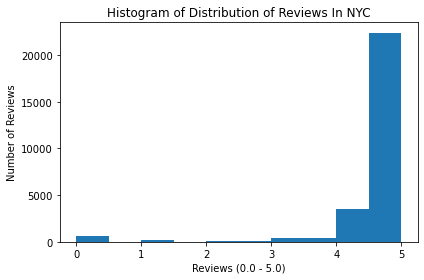

In [3]:
df = pd.read_csv(data_path + "listings.csv")
plt.hist(df["review_scores_rating"])
plt.title("Histogram of Distribution of Reviews In NYC")
plt.xlabel("Reviews (0.0 - 5.0)")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()

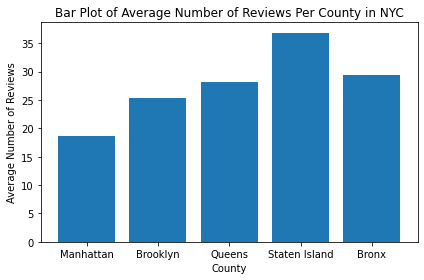

In [4]:
county = df["neighbourhood_group_cleansed"].unique() 
avg_review = []
for c in county:
    avg = ((df[df["neighbourhood_group_cleansed"] == c])["number_of_reviews"]).mean()
    avg_review.append(avg)
plt.bar(county, avg_review)
plt.title("Bar Plot of Average Number of Reviews Per County in NYC")
plt.xlabel("County")
plt.ylabel("Average Number of Reviews")
plt.tight_layout()
plt.show()

/var/folders/k3/cs9cbmpj39565kz5_701s7c40000gn/T/ipykernel_4955/446482802.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df["price"].str.replace('$', '')


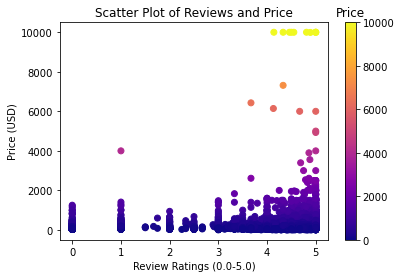

In [5]:
df = pd.read_csv(data_path + "listings.csv") 
df['price'] = df["price"].str.replace('$', '')
df['price'] = df["price"].str.replace(',', '')
df["price"] = pd.to_numeric(df["price"])
scatter_df = df[['price', 'review_scores_rating']]
drop_na = scatter_df.dropna()
plt.scatter(drop_na["review_scores_rating"], drop_na["price"], c=drop_na['price'], cmap='plasma')
plt.title("Scatter Plot of Reviews and Price")
plt.xlabel("Review Ratings (0.0-5.0)") 
plt.ylabel("Price (USD)")
clb = plt.colorbar() 
clb.ax.set_title('Price')
plt.show()